# **Task 1**

### ***Exploratory Data Analysis***

In [23]:
import pandas as pd
# Load dataset
df = pd.read_csv('dataset.csv') 
df.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


### **Histograms for each feature**

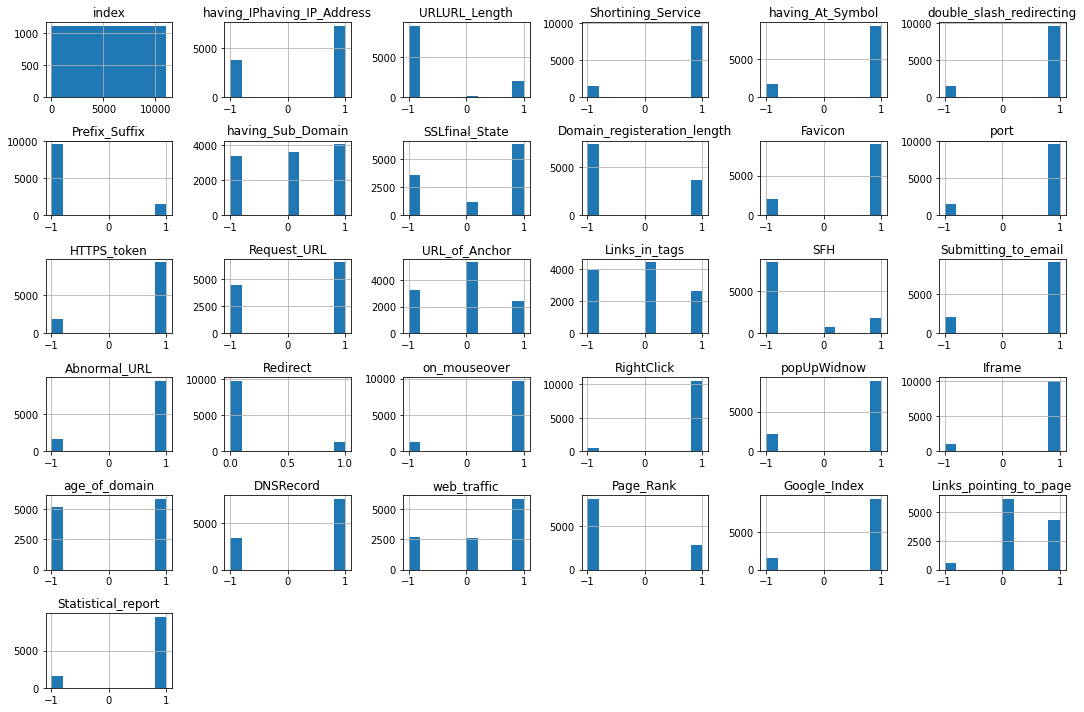

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df.drop('Result', axis=1).hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### **Heatmap for feature correlation**

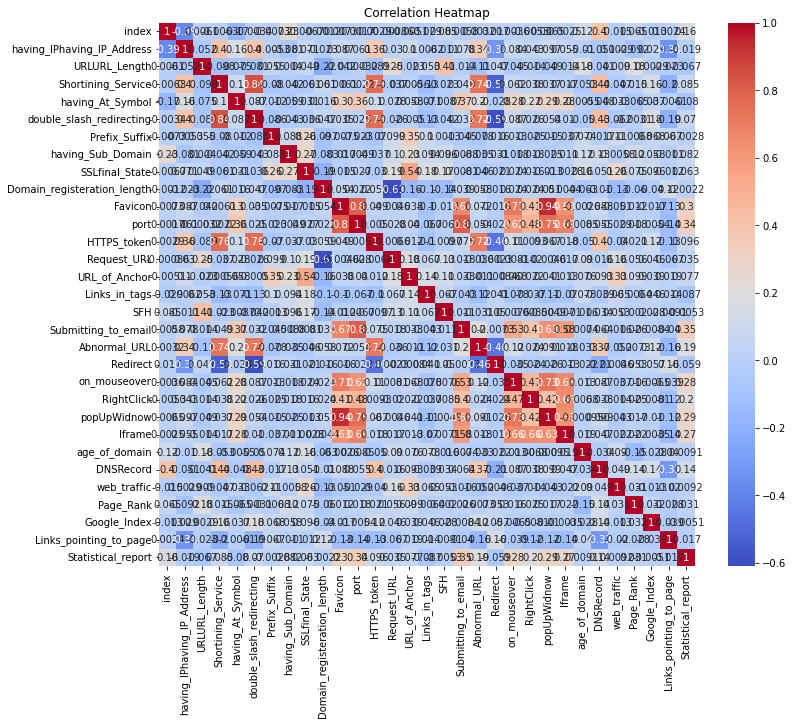

In [25]:
correlation_matrix = df.drop('Result', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Number of samples and unique elements in each feature**


In [41]:
num_samples = len(df)
unique_elmnts = df.nunique()

print(f'No of samples: {num_samples}')
print('Unique elements in each feature:')
print(unique_elmnts)

No of samples: 11055
Unique elements in each feature:
index                          11055
having_IPhaving_IP_Address         2
URLURL_Length                      3
Shortining_Service                 2
having_At_Symbol                   2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Redirect                           2
RightClick                         2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
Page_Rank                          2
Google_Index                       2
Links_pointing_to_page             3
Statistical_report                 2
Result                             2
dtype: int64


### **Checking for null values**

In [27]:
null_values = df.isnull().sum()
print('Null values in each feature:')
print(null_values)

Null values in each feature:
index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing

### **Removing high correlated features**

In [28]:
threshold = 0.7
cor_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold and correlation_matrix.columns[i] != 'Result':
            colname = correlation_matrix.columns[i]
            cor_features.add(colname)

df.drop(cor_features, axis=1, inplace=True)

# *Task 2*

### **Building Classification Model**

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Splitting data into features and target variable
X = df.drop('Result', axis=1)  
y = df['Result']  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define  models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

logreg.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

models = [logreg, rf_classifier]

max_accuracies = [] 

# Performing cross-validation for each model
for model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'Cross-Validation Scores for {model.__class__.__name__}: {cv_scores}')
    print(f'Mean CV Accuracy for {model.__class__.__name__}: {np.mean(cv_scores)}')
# Maximum accuracy for this model
    max_accuracy = np.max(cv_scores)  
    max_accuracies.append(max_accuracy)

Cross-Validation Scores for LogisticRegression: [0.92312041 0.91859808 0.92198982 0.93046919 0.93438914]
Mean CV Accuracy for LogisticRegression: 0.9257133283369443
Cross-Validation Scores for RandomForestClassifier: [0.96438666 0.96212549 0.96664782 0.96721311 0.96323529]
Mean CV Accuracy for RandomForestClassifier: 0.9647216772520201


## **Calculating ROC curve and AUC**

In [66]:
y_scores = rf_classifier.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

## **Plotting ROC curve**

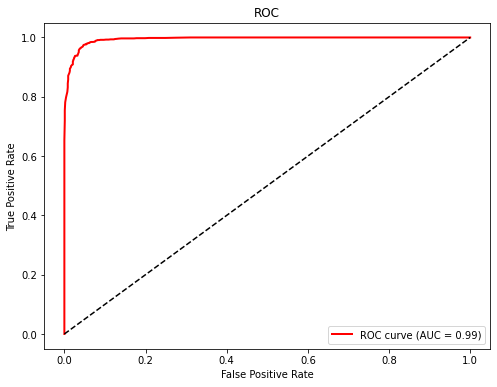

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

## **Finding best model with the max accuracy**

In [70]:
best_model_index = np.argmax(max_accuracies)
best_model = models[best_model_index]  
best_accuracy = max_accuracies[best_model_index]
print(f'The best model is {best_model.__class__.__name__} with an accuracy of {best_accuracy:.2f}')

The best model is RandomForestClassifier with an accuracy of 0.97
